<a href="https://colab.research.google.com/github/Pankaj122002/Python/blob/Machine-Learning/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



# Loading Dataset

In [3]:
wine = pd.read_csv("winequalityN.csv")
print("Successfully Imported Data!")
wine.head()

Successfully Imported Data!


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print(wine.shape)

(6497, 13)


# Description

In [5]:
wine.describe(include='all')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Data cleaning

In [7]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
wine = wine.fillna(0)

In [9]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
wine.corr()

<ipython-input-10-912b141e35eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.212576,0.320668,-0.110573,0.292623,-0.274535,-0.322457,0.448739,-0.168988,0.293984,-0.093488,-0.074060
volatile acidity,0.212576,1.000000,-0.377545,-0.194984,0.376288,-0.352004,-0.414812,0.270759,0.211092,0.221506,-0.037229,-0.265671
citric acid,0.320668,-0.377545,1.000000,0.141796,0.038836,0.132757,0.194515,0.095693,-0.266023,0.059221,-0.009973,0.085780
residual sugar,-0.110573,-0.194984,0.141796,1.000000,-0.129072,0.402610,0.495294,0.552498,-0.211736,-0.184451,-0.359276,-0.037087
chlorides,0.292623,0.376288,0.038836,-0.129072,1.000000,-0.194886,-0.279562,0.362519,0.037356,0.393436,-0.256871,-0.200278
free sulfur dioxide,-0.274535,-0.352004,0.132757,0.402610,-0.194886,1.000000,0.720934,0.025717,-0.115421,-0.187733,-0.179838,0.055463
total sulfur dioxide,-0.322457,-0.414812,0.194515,0.495294,-0.279562,0.720934,1.000000,0.032395,-0.187053,-0.273385,-0.265740,-0.041385
density,0.448739,0.270759,0.095693,0.552498,0.362519,0.025717,0.032395,1.000000,0.011482,0.258008,-0.686745,-0.305858
pH,-0.168988,0.211092,-0.266023,-0.211736,0.037356,-0.115421,-0.187053,0.011482,1.000000,0.148389,0.099930,0.013723
sulphates,0.293984,0.221506,0.059221,-0.184451,0.393436,-0.187733,-0.273385,0.258008,0.148389,1.000000,-0.003263,0.039987


In [11]:
wine.groupby('quality').mean()

<ipython-input-11-7f45bf9370d8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wine.groupby('quality').mean()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.059880,20.636574,103.432870,0.994833,3.231620,0.502546,10.180093
5,7.312208,0.389404,0.307577,5.804116,0.064666,30.237371,120.839102,0.995849,3.207535,0.526169,9.837783
6,7.167913,0.313288,0.323558,5.549224,0.054149,31.165021,115.410790,0.994558,3.213163,0.532091,10.587553
7,7.128962,0.288360,0.334764,4.729564,0.045272,30.422150,108.498610,0.993126,3.221807,0.547025,11.386006
8,6.803109,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


# Data Analysis

## Countplot:

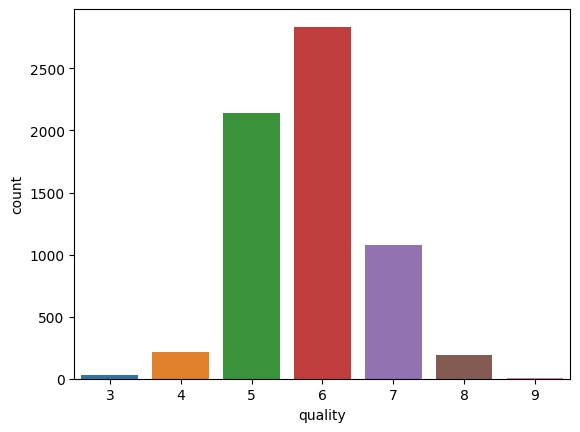

In [12]:
sns.countplot(x= 'quality' , data = wine)
plt.show()

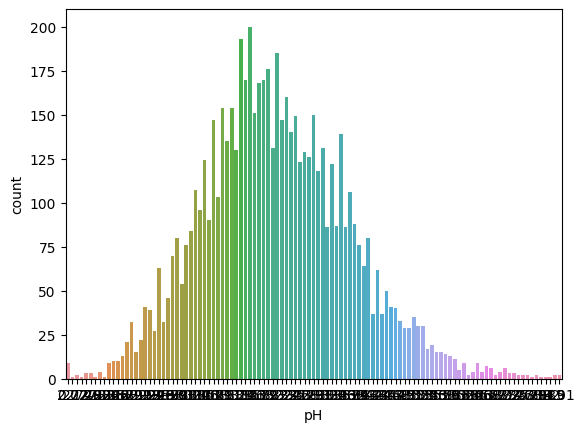

In [13]:
sns.countplot(x= 'pH' , data = wine)
plt.show()

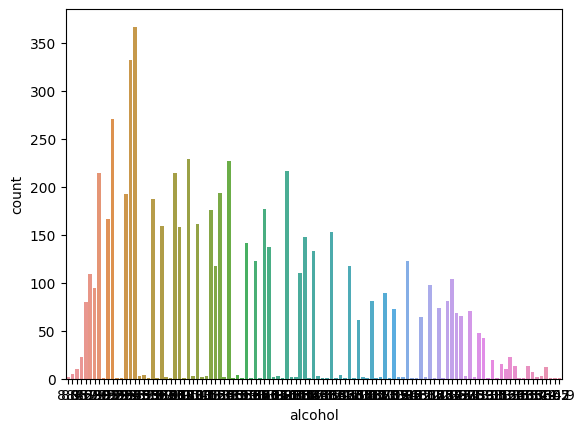

In [14]:
sns.countplot(x= 'alcohol' , data = wine)
plt.show()

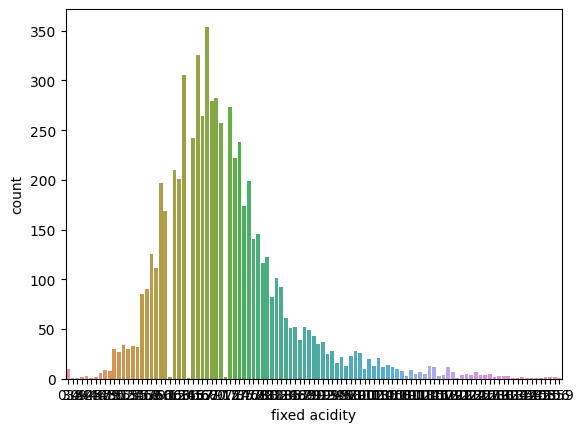

In [15]:
sns.countplot(x= 'fixed acidity' , data = wine)
plt.show()

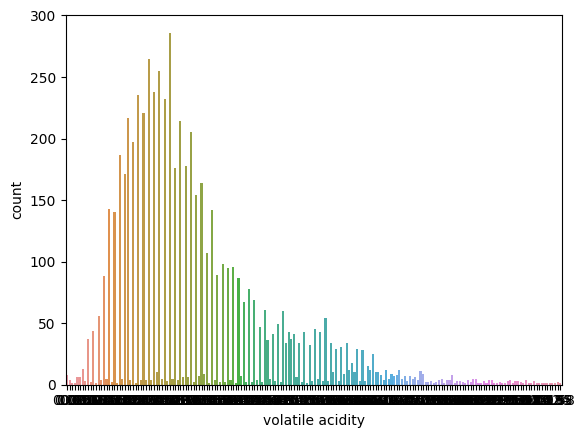

In [16]:
sns.countplot(x= 'volatile acidity' , data = wine)
plt.show()

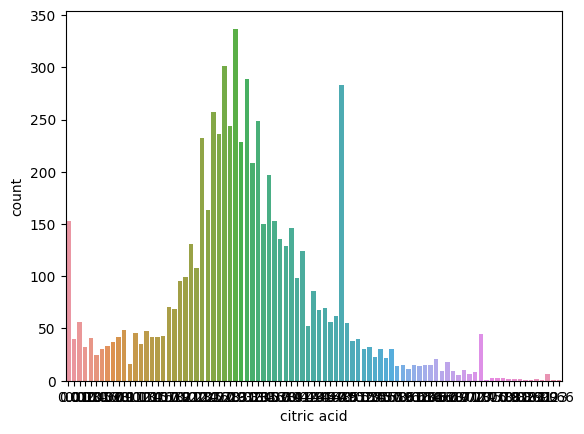

In [17]:
sns.countplot(x= 'citric acid' , data = wine)
plt.show()

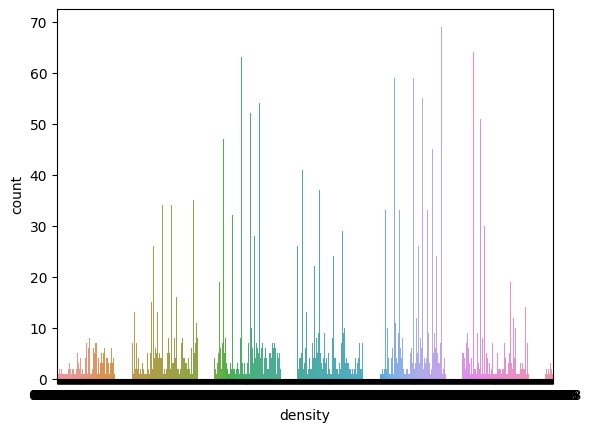

In [18]:
sns.countplot(x= 'density' , data = wine)
plt.show()

## KDE plot:

<Axes: xlabel='quality', ylabel='Density'>

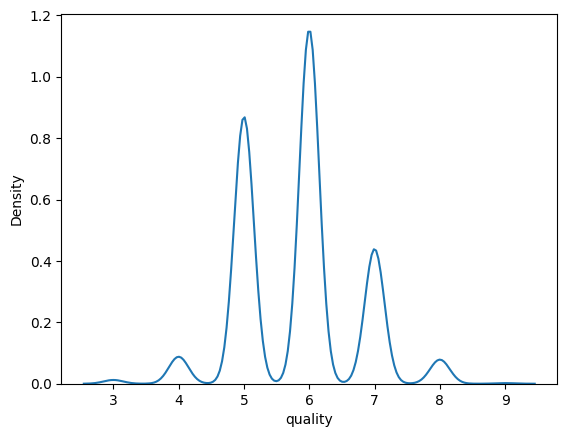

In [19]:
sns.kdeplot(wine.query('quality > 2').quality)

## Distplot:

<ipython-input-20-27c1d1bd3be9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

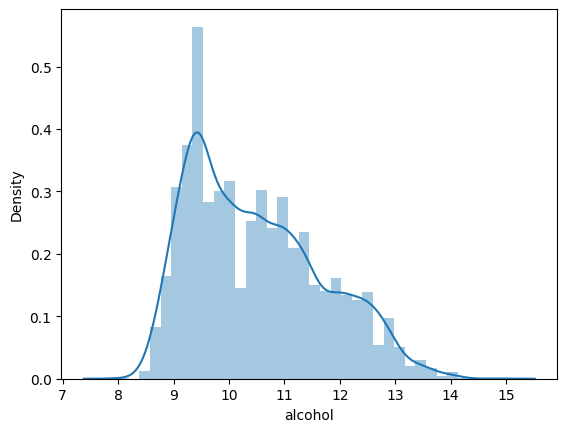

In [20]:
sns.distplot(wine['alcohol'])

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

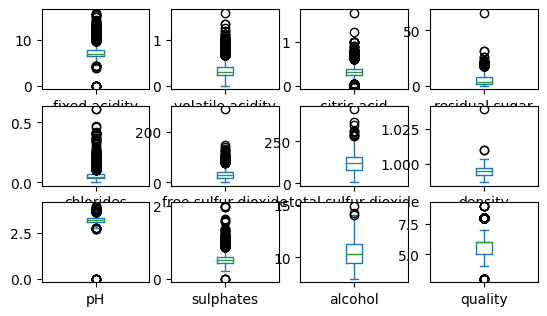

In [21]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

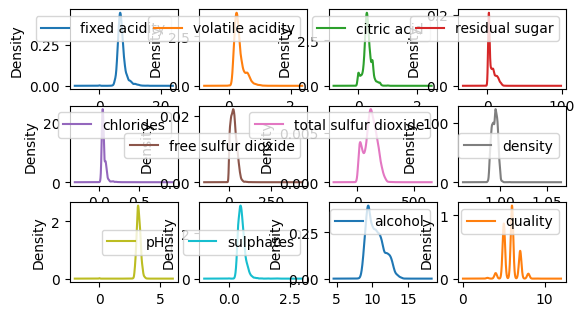

In [22]:
wine.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

## Histogram

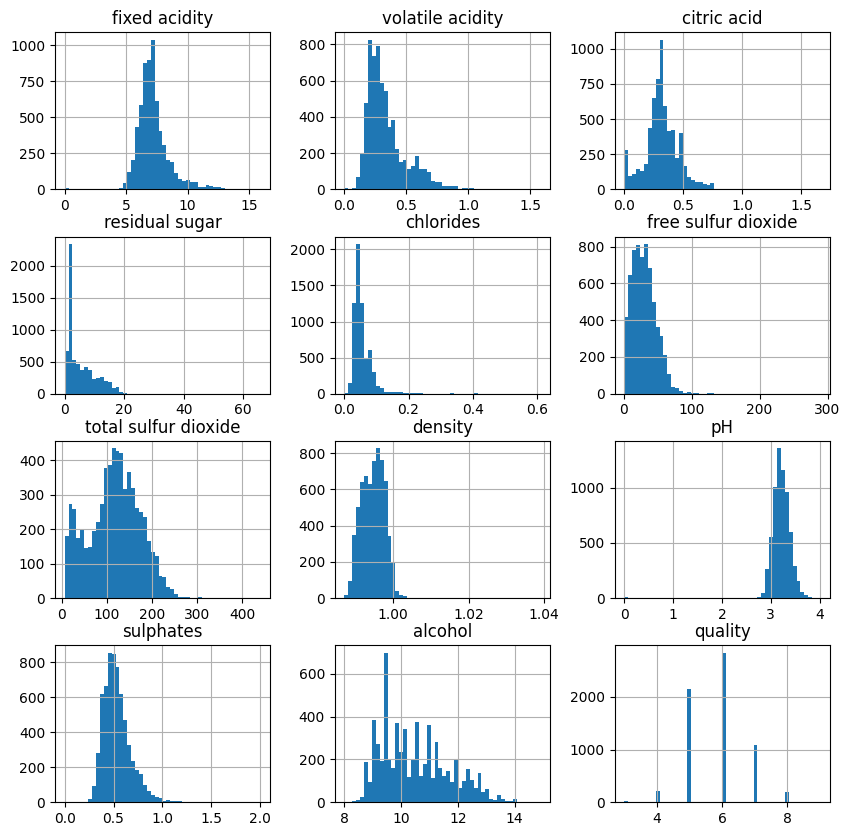

In [23]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

# Heatmap for expressing correlation

<ipython-input-24-95e019e82ae4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = wine.corr()


<Axes: >

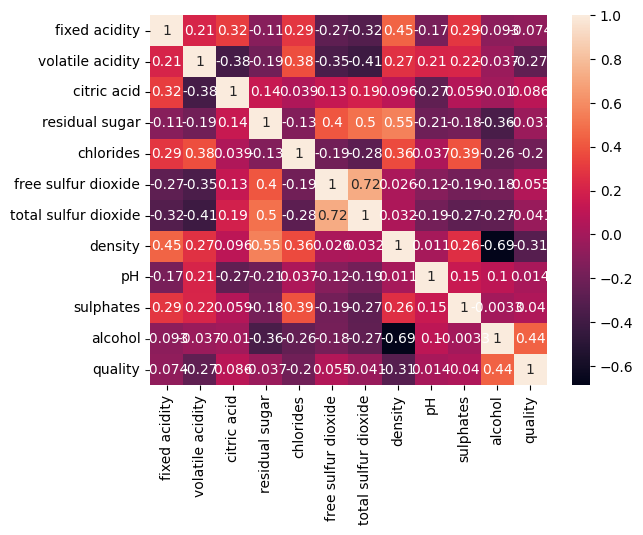

In [24]:
corr = wine.corr()
sns.heatmap(corr,annot=True)

## Pair Plot:

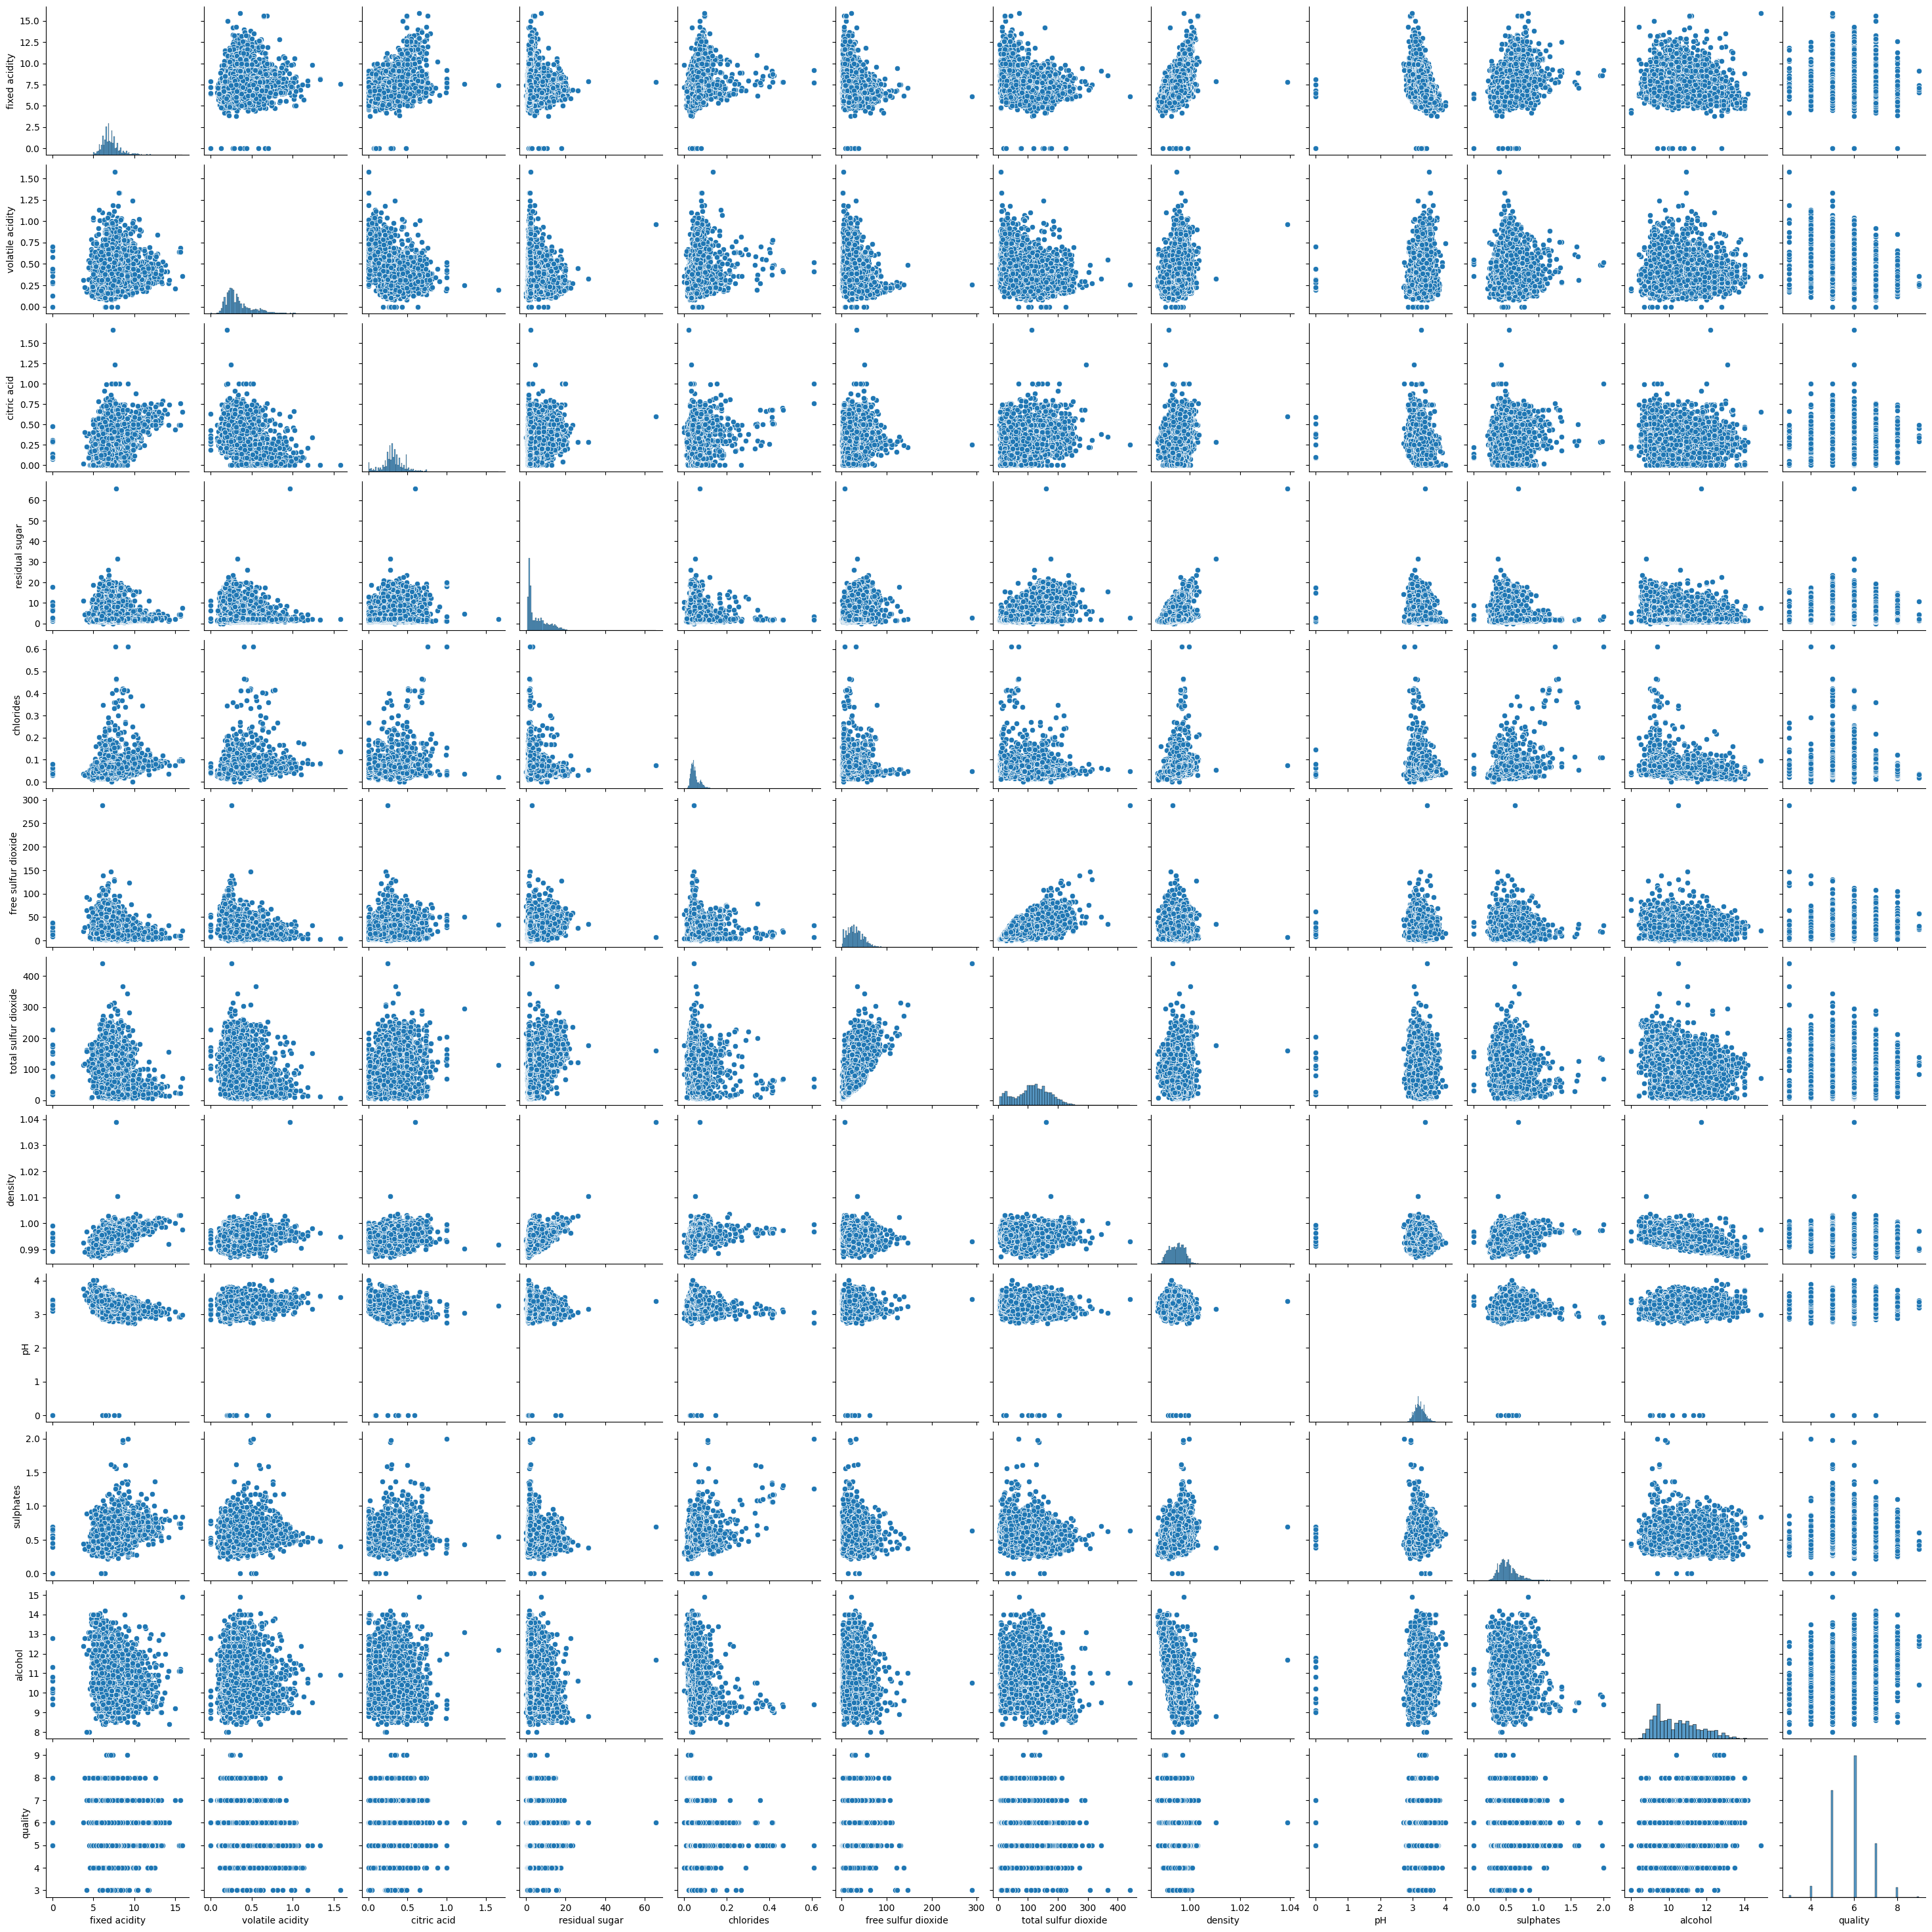

In [25]:
sns.pairplot(wine)

## Violinplot:

<Axes: xlabel='quality', ylabel='alcohol'>

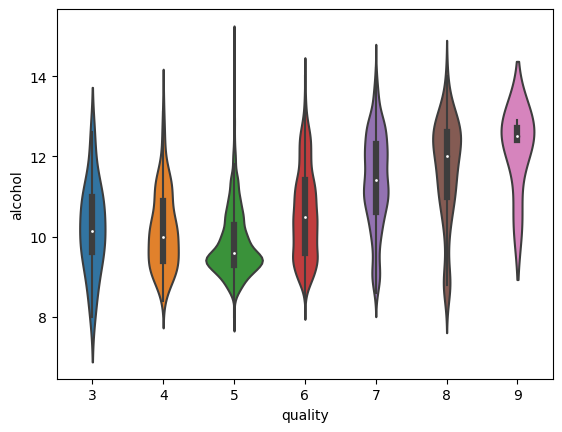

In [26]:
sns.violinplot(x='quality', y='alcohol', data=wine)

# Feature Selection

In [27]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality','type'] , axis = 1)
Y = wine['goodquality']

In [28]:
# See proportion of good vs bad wines
wine['goodquality'].value_counts()

0    5220
1    1277
Name: goodquality, dtype: int64

In [29]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.00,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [30]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: goodquality, Length: 6497, dtype: int64


# Feature Importance

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07146854 0.08797081 0.07734723 0.08157386 0.08438977 0.07958313
 0.07871983 0.09964989 0.07697628 0.08273966 0.17958099]


# Splitting Dataset

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# LogisticRegression:

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train,Y_train)
Y_pred1 = lr.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred1))

Accuracy Score: 0.8174358974358974


In [37]:
confusion_mat = confusion_matrix(Y_test,Y_pred1)
print(confusion_mat)

[[1496   51]
 [ 305   98]]


# Using KNN:

In [40]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train,Y_train)
y_pred2 = kn.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.7897435897435897


# Using SVC:

In [41]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
y_pred3 = svc.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7933333333333333


# Using Decision Tree:

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=7)
dt.fit(X_train,Y_train)
y_pred4 = dt.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.8476923076923077


# Using GaussianNB:

In [44]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,Y_train)
y_pred4 = gb.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7497435897435898


# Using Random Forest:

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, Y_train)
y_pred5 = rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.8789743589743589


# Using Xgboost:

In [47]:
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=1)
xg.fit(X_train, Y_train)
y_pred6 = xg.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred6))

Accuracy Score: 0.8676923076923077


#Result


In [51]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.811,0.789,0.793,0.847,0.749,0.878,0.867]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.878,Random Forest
0.867,Xgboost
0.847,Decision Tree
0.811,Logistic Regression
0.793,SVC
0.789,KNN
0.749,GaussianNB


In [50]:
#Hence I will use Random Forest algorithms for training my model.

In [52]:
y_pred5

array([0, 0, 0, ..., 0, 1, 0])